# Capstone 3 - Modeling

## Imports

In [1]:
import pandas as pd
import numpy as np

## Loading the data

In [2]:
# training set and testing set filepaths

train_filepath = 'trainset.csv'
test_filepath = 'testset.csv'

In [3]:
# load the dataframes

train = pd.read_csv(train_filepath, index_col = 0)
test = pd.read_csv(test_filepath, index_col = 0)

In [4]:
train.head()

,0,1,2,3,4,5,6,7,8,9,...,3127,3128,3129,3130,3131,3132,3133,3134,3135,LABELS
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0
1,0.631477,0.474325,0.496746,0.572291,0.542708,0.510081,0.504916,0.616837,0.552774,0.760851,...,0.592208,0.632835,0.659415,0.729234,0.753858,0.691635,0.628948,0.634593,0.634102,0
2,0.557105,0.560474,0.569060,0.571395,0.567972,0.558771,0.548537,0.543532,0.537782,0.540187,...,0.646642,0.646647,0.646909,0.648991,0.638868,0.629827,0.625742,0.621388,0.621601,0
3,0.235879,0.239107,0.232280,0.235348,0.212797,0.171313,0.164235,0.161383,0.066190,0.032078,...,0.023305,0.034938,0.038596,0.045549,0.055856,0.064795,0.071786,0.076666,0.072266,0
4,0.005088,0.004549,0.004795,0.003516,0.025543,0.067520,0.065183,0.076644,0.099080,0.089463,...,0.053380,0.055827,0.038170,0.038152,0.018193,0.015534,0.007783,0.002488,0.003079,0


In [5]:
test.head()

,0,1,2,3,4,5,6,7,8,9,...,3127,3128,3129,3130,3131,3132,3133,3134,3135,LABELS
1261,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0
1262,0.979827,0.979827,0.979827,0.979827,0.979827,0.979827,0.979827,0.979827,0.979827,0.979827,...,0.979827,0.979827,0.979827,0.979827,0.979827,0.979827,0.979827,0.979827,0.979827,0
1263,0.228456,0.233299,0.238537,0.244887,0.252188,0.258202,0.253488,0.254455,0.272597,0.270954,...,0.295544,0.314653,0.197712,0.236542,0.142194,0.175200,0.236962,0.195978,0.245040,0
1264,0.274738,0.280559,0.284791,0.287670,0.291595,0.295148,0.296399,0.299363,0.302499,0.303878,...,0.429746,0.431706,0.432781,0.422164,0.414388,0.416908,0.413745,0.410257,0.409743,0
1265,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0


In [6]:
# seperating image data (pixel values) and labels

train_X = train.iloc[:,0:3136]
# train_y = train.iloc[:,3136:3137]
train_y = np.asarray(train["LABELS"])
test_X = test.iloc[:,0:3136]
# test_y = test.iloc[:,3136:3137]
test_y = np.asarray(test["LABELS"])

## Prep

In [7]:
def w_label(wo_label):
    """
    This function accepts an array of model predictions of the test set images and returns 
    a list with the actual names in string values corresponding to each prediction. Used to make 
    the confusion matrix plots throughout this notebook.
    """
    
    test_y_pred_w_labels = []
    for i in range(len(wo_label)):
        if wo_label[i] == 0:
            test_y_pred_w_labels.append("baseballs")
        if wo_label[i] == 1:
            test_y_pred_w_labels.append("basketballs")
        if wo_label[i] == 2:
            test_y_pred_w_labels.append("beachballs")
        if wo_label[i] == 3:
            test_y_pred_w_labels.append("bowling_balls")
        if wo_label[i] == 4:
            test_y_pred_w_labels.append("brass_balls")
        if wo_label[i] == 5:
            test_y_pred_w_labels.append("cricket_balls")
        if wo_label[i] == 6:
            test_y_pred_w_labels.append("footballs")
        if wo_label[i] == 7:
            test_y_pred_w_labels.append("golf_balls")
        if wo_label[i] == 8:
            test_y_pred_w_labels.append("soccer_balls")
        if wo_label[i] == 9:
            test_y_pred_w_labels.append("tennis_balls")
        if wo_label[i] == 10:
            test_y_pred_w_labels.append("volleyballs")
        if wo_label[i] == 11:
            test_y_pred_w_labels.append("water_polo_balls")
        if wo_label[i] == 12:
            test_y_pred_w_labels.append("wiffle_balls")
    return np.asarray(test_y_pred_w_labels)

# confusion matrix labels

labels = np.asarray(["baseballs", 
                     "basketballs", 
                     "beachballs", 
                     "bowling_balls", 
                     "brass_balls", 
                     "cricket_balls", 
                     "footballs", 
                     "golf_balls", 
                     "soccer_balls", 
                     "tennis_balls", 
                     "volleyballs", 
                     "water_polo_balls", 
                     "wiffle_balls"])

# true labels for the test set (13 classes x 5 images per class = 65 images)

test_y_w_labels = np.asarray(["baseballs", "baseballs", "baseballs", "baseballs", "baseballs", 
                              "basketballs", "basketballs", "basketballs", "basketballs", "basketballs", 
                              "beachballs", "beachballs", "beachballs", "beachballs", "beachballs", 
                              "bowling_balls", "bowling_balls", "bowling_balls", "bowling_balls", "bowling_balls", 
                              "brass_balls", "brass_balls", "brass_balls", "brass_balls", "brass_balls", 
                              "cricket_balls", "cricket_balls", "cricket_balls", "cricket_balls", "cricket_balls", 
                              "footballs", "footballs", "footballs", "footballs", "footballs", 
                              "golf_balls", "golf_balls", "golf_balls", "golf_balls", "golf_balls", 
                              "soccer_balls", "soccer_balls", "soccer_balls", "soccer_balls", "soccer_balls", 
                              "tennis_balls", "tennis_balls", "tennis_balls", "tennis_balls", "tennis_balls", 
                              "volleyballs", "volleyballs", "volleyballs", "volleyballs", "volleyballs", 
                              "water_polo_balls", "water_polo_balls", "water_polo_balls", "water_polo_balls", "water_polo_balls", 
                              "wiffle_balls", "wiffle_balls", "wiffle_balls", "wiffle_balls", "wiffle_balls"])

# true labels for the train set (13 classes x 97 images per class = 1261 images)

train_y_w_labels = []

for i in range(13):
    ball = labels[i]
    for j in range(97):
        train_y_w_labels.append(ball)
        
train_y_w_labels = np.asarray(train_y_w_labels)

## Models

### Decision Tree

In [8]:
import matplotlib.pyplot as plt

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [9]:
# decsion tree classifier model

dt = DecisionTreeClassifier(random_state = 77)

In [10]:
# hyperparameters

param_grid = {'criterion':['gini', 'entropy']}

dt_i_cv = GridSearchCV(dt, param_grid=param_grid, cv=5, n_jobs=-1)

dt_i_cv.fit(train_X, train_y)

best_combo = dt_i_cv.best_params_
print('Best combination:', best_combo)

Best combination: {'criterion': 'entropy'}


In [11]:
# predicting and measuring accuracy

train_y_pred = dt_i_cv.predict(train_X)
test_y_pred = dt_i_cv.predict(test_X)

print("Accuracy on training set:", accuracy_score(train_y, train_y_pred))
print("\nAccuracy on testing set:", accuracy_score(test_y, test_y_pred))

Accuracy on training set: 1.0

Accuracy on testing set: 0.3076923076923077


Train set:


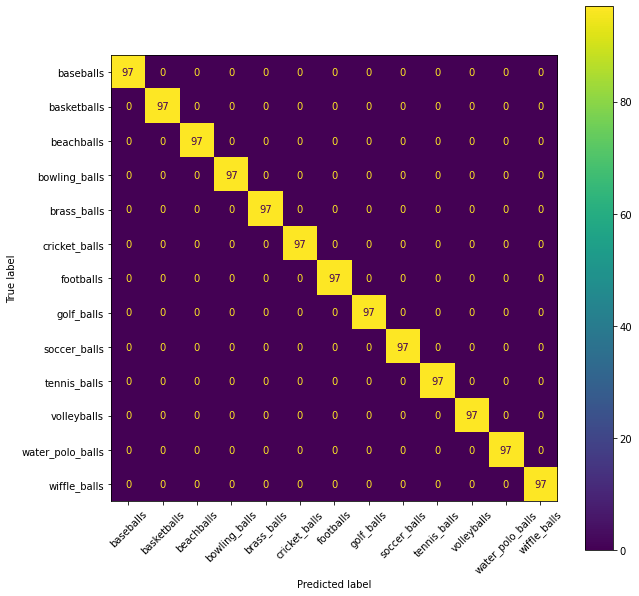

In [12]:
# plotting confusion matrix for the train set

labels = ["baseballs", "basketballs", "beachballs", "bowling_balls", "brass_balls", "cricket_balls", "footballs", "golf_balls", "soccer_balls", "tennis_balls", "volleyballs", "water_polo_balls", "wiffle_balls"]

train_y_pred_w_labels = w_label(train_y_pred)
cm = confusion_matrix(train_y_w_labels, train_y_pred_w_labels, labels=labels)
print("Train set:")
disp, ax = plt.subplots(figsize=(10, 10))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
_ = disp.plot(ax=ax)
_ = plt.xticks(rotation = 45)

Test set:


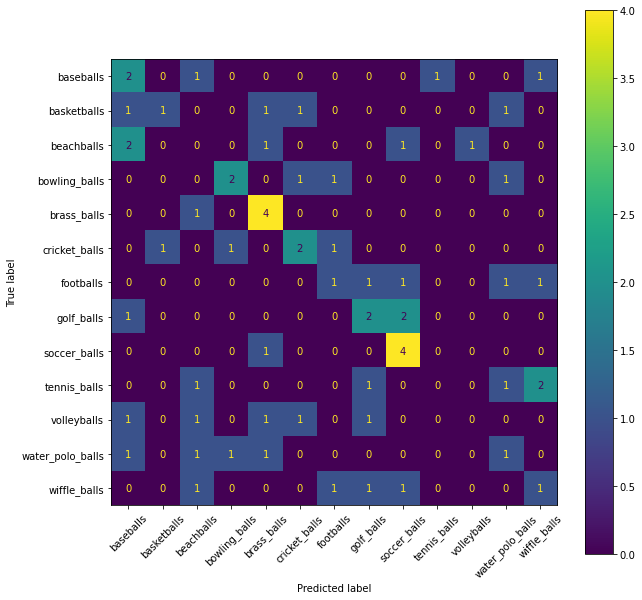

In [13]:
# plotting confusion matrix for the test set

labels = ["baseballs", "basketballs", "beachballs", "bowling_balls", "brass_balls", "cricket_balls", "footballs", "golf_balls", "soccer_balls", "tennis_balls", "volleyballs", "water_polo_balls", "wiffle_balls"]

test_y_pred_w_labels = w_label(test_y_pred)
cm = confusion_matrix(test_y_w_labels, test_y_pred_w_labels, labels=labels)
print("Test set:")
disp, ax = plt.subplots(figsize=(10, 10))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
_ = disp.plot(ax=ax)
_ = plt.xticks(rotation = 45)

### Decision Tree II

In [14]:
# hyperparameters

param_grid = {'criterion':['gini', 'entropy'],
              'max_depth':[None, np.arange(0,101,10)]}

dt_ii_cv = GridSearchCV(dt, param_grid=param_grid, cv=5, n_jobs=-1)

dt_ii_cv.fit(train_X, train_y)

best_combo = dt_ii_cv.best_params_
print('Best combination:', best_combo)

Best combination: {'criterion': 'entropy', 'max_depth': None}


In [15]:
# predicting and measuring accuracy

train_y_pred = dt_ii_cv.predict(train_X)
test_y_pred = dt_ii_cv.predict(test_X)

print("Accuracy on training set:", accuracy_score(train_y, train_y_pred))
print("\nAccuracy on testing set:", accuracy_score(test_y, test_y_pred))

Accuracy on training set: 1.0

Accuracy on testing set: 0.3076923076923077


Train set:


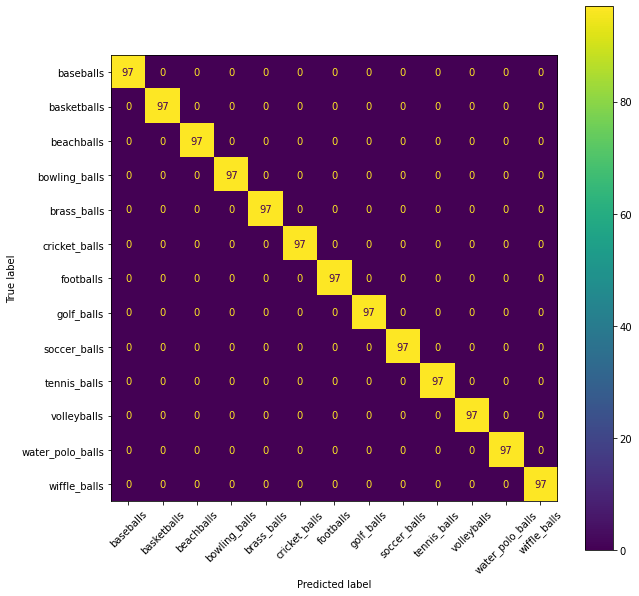

In [16]:
# plotting confusion matrix for the train set

labels = ["baseballs", "basketballs", "beachballs", "bowling_balls", "brass_balls", "cricket_balls", "footballs", "golf_balls", "soccer_balls", "tennis_balls", "volleyballs", "water_polo_balls", "wiffle_balls"]

train_y_pred_w_labels = w_label(train_y_pred)
cm = confusion_matrix(train_y_w_labels, train_y_pred_w_labels, labels=labels)
print("Train set:")
disp, ax = plt.subplots(figsize=(10, 10))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
_ = disp.plot(ax=ax)
_ = plt.xticks(rotation = 45)

Test set:


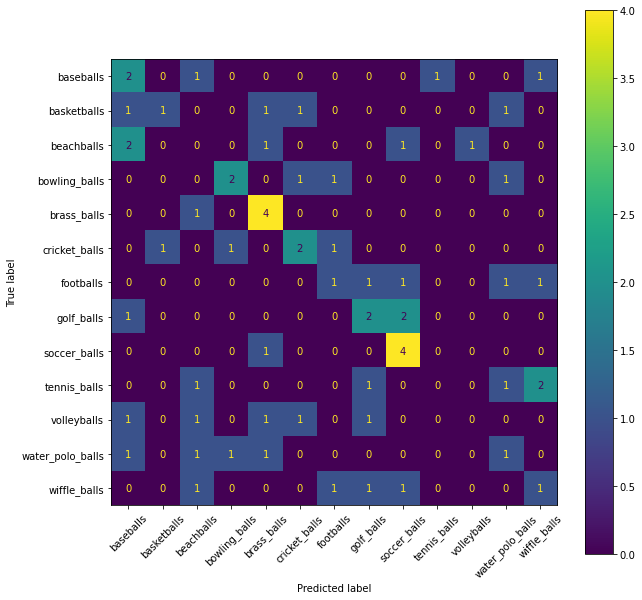

In [17]:
# plotting confusion matrix for the test set

labels = ["baseballs", "basketballs", "beachballs", "bowling_balls", "brass_balls", "cricket_balls", "footballs", "golf_balls", "soccer_balls", "tennis_balls", "volleyballs", "water_polo_balls", "wiffle_balls"]

test_y_pred_w_labels = w_label(test_y_pred)
cm = confusion_matrix(test_y_w_labels, test_y_pred_w_labels, labels=labels)
print("Test set:")
disp, ax = plt.subplots(figsize=(10, 10))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
_ = disp.plot(ax=ax)
_ = plt.xticks(rotation = 45)

### Decision Tree III

In [18]:
# hyperparameters

param_grid = {'criterion':['gini', 'entropy'],
              'max_depth':[None, np.arange(0,101,10)], 
              'min_samples_leaf':np.arange(0,101,10)}

dt_iii_cv = GridSearchCV(dt, param_grid=param_grid, cv=5, n_jobs=-1)

dt_iii_cv.fit(train_X, train_y)

best_combo = dt_iii_cv.best_params_
print('Best combination:', best_combo)

Best combination: {'criterion': 'entropy', 'max_depth': None, 'min_samples_leaf': 20}


In [19]:
# predicting and measuring accuracy

train_y_pred = dt_iii_cv.predict(train_X)
test_y_pred = dt_iii_cv.predict(test_X)

print("Accuracy on training set:", accuracy_score(train_y, train_y_pred))
print("\nAccuracy on testing set:", accuracy_score(test_y, test_y_pred))

Accuracy on training set: 0.4607454401268834

Accuracy on testing set: 0.2153846153846154


Train set:


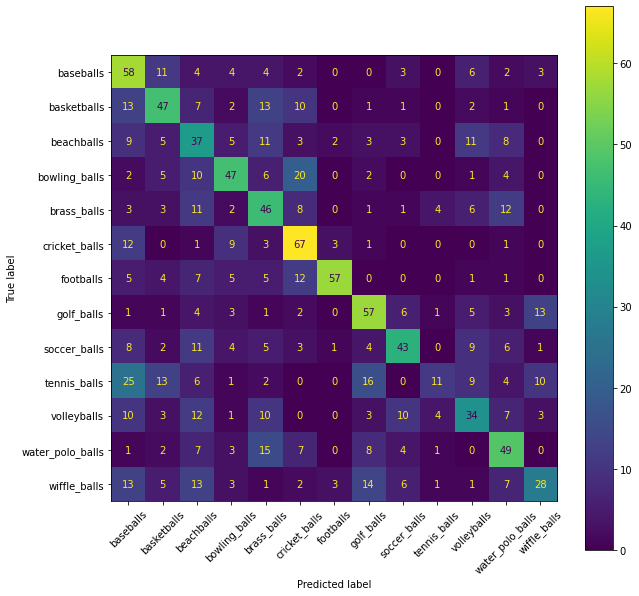

In [20]:
# plotting confusion matrix for the train set

labels = ["baseballs", "basketballs", "beachballs", "bowling_balls", "brass_balls", "cricket_balls", "footballs", "golf_balls", "soccer_balls", "tennis_balls", "volleyballs", "water_polo_balls", "wiffle_balls"]

train_y_pred_w_labels = w_label(train_y_pred)
cm = confusion_matrix(train_y_w_labels, train_y_pred_w_labels, labels=labels)
print("Train set:")
disp, ax = plt.subplots(figsize=(10, 10))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
_ = disp.plot(ax=ax)
_ = plt.xticks(rotation = 45)

Test set:


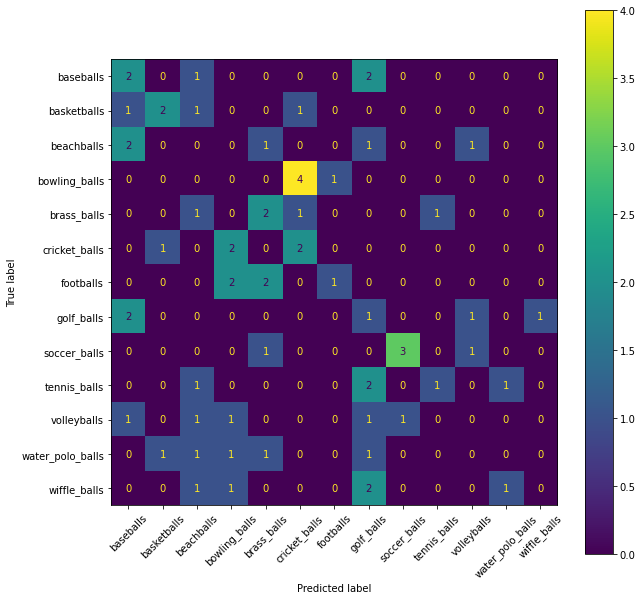

In [21]:
# plotting confusion matrix for the test set

labels = ["baseballs", "basketballs", "beachballs", "bowling_balls", "brass_balls", "cricket_balls", "footballs", "golf_balls", "soccer_balls", "tennis_balls", "volleyballs", "water_polo_balls", "wiffle_balls"]

test_y_pred_w_labels = w_label(test_y_pred)
cm = confusion_matrix(test_y_w_labels, test_y_pred_w_labels, labels=labels)
print("Test set:")
disp, ax = plt.subplots(figsize=(10, 10))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
_ = disp.plot(ax=ax)
_ = plt.xticks(rotation = 45)

### Random Forest

In [22]:
import matplotlib.pyplot as plt

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [23]:
# random forest classifier model

rf = RandomForestClassifier(random_state = 77)

In [24]:
# hyperparameters

param_grid = {'criterion':['gini', 'entropy']}

rf_i_cv = GridSearchCV(rf, param_grid=param_grid, cv=5, n_jobs=-1)

rf_i_cv.fit(train_X, np.ravel(train_y))

best_combo = rf_i_cv.best_params_
print('Best combination:', best_combo)

Best combination: {'criterion': 'entropy'}


In [25]:
# predicting and measuring accuracy

train_y_pred = rf_i_cv.predict(train_X)
test_y_pred = rf_i_cv.predict(test_X)

print("Accuracy on training set:", accuracy_score(train_y, train_y_pred))
print("\nAccuracy on testing set:", accuracy_score(test_y, test_y_pred))

Accuracy on training set: 1.0

Accuracy on testing set: 0.49230769230769234


Train set:


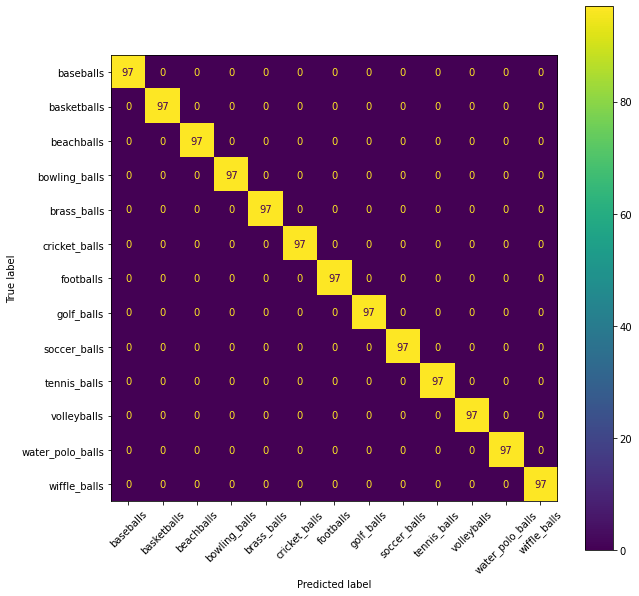

In [26]:
# plotting confusion matrix for the train set

labels = ["baseballs", "basketballs", "beachballs", "bowling_balls", "brass_balls", "cricket_balls", "footballs", "golf_balls", "soccer_balls", "tennis_balls", "volleyballs", "water_polo_balls", "wiffle_balls"]

train_y_pred_w_labels = w_label(train_y_pred)
cm = confusion_matrix(train_y_w_labels, train_y_pred_w_labels, labels=labels)
print("Train set:")
disp, ax = plt.subplots(figsize=(10, 10))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
_ = disp.plot(ax=ax)
_ = plt.xticks(rotation = 45)

Test set:


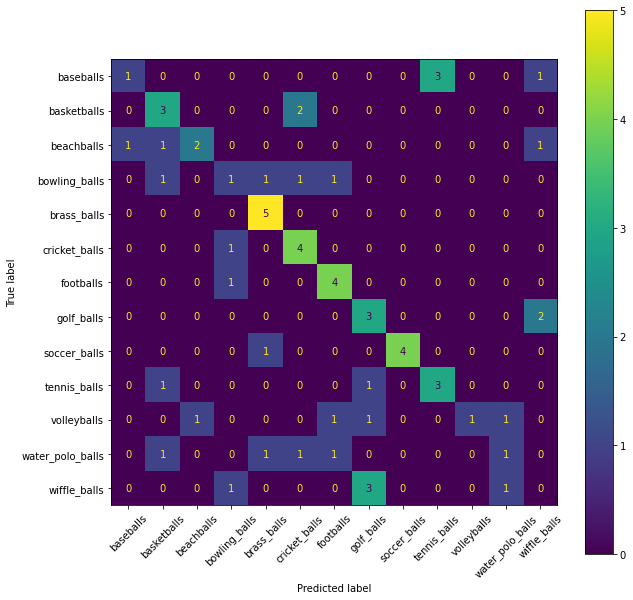

In [27]:
# plotting confusion matrix for the test set

labels = ["baseballs", "basketballs", "beachballs", "bowling_balls", "brass_balls", "cricket_balls", "footballs", "golf_balls", "soccer_balls", "tennis_balls", "volleyballs", "water_polo_balls", "wiffle_balls"]

test_y_pred_w_labels = w_label(test_y_pred)
cm = confusion_matrix(test_y_w_labels, test_y_pred_w_labels, labels=labels)
print("Test set:")
disp, ax = plt.subplots(figsize=(10, 10))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
_ = disp.plot(ax=ax)
_ = plt.xticks(rotation = 45)

### Random Forest II

In [28]:
# hyperparameters

param_grid = {'criterion':['gini', 'entropy'], 
              'n_estimators':np.arange(0,101,10)}

rf_ii_cv = GridSearchCV(rf, param_grid=param_grid, cv=5, n_jobs=-1)

rf_ii_cv.fit(train_X, np.ravel(train_y))

best_combo = rf_ii_cv.best_params_
print('Best combination:', best_combo)

Best combination: {'criterion': 'entropy', 'n_estimators': 80}


In [29]:
# predicting and measuring accuracy

train_y_pred = rf_ii_cv.predict(train_X)
test_y_pred = rf_ii_cv.predict(test_X)

print("Accuracy on training set:", accuracy_score(train_y, train_y_pred))
print("\nAccuracy on testing set:", accuracy_score(test_y, test_y_pred))

Accuracy on training set: 1.0

Accuracy on testing set: 0.4461538461538462


Train set:


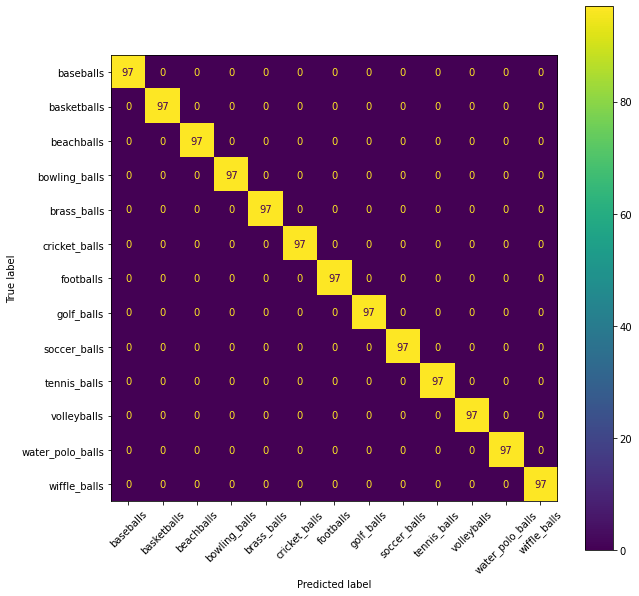

In [30]:
# plotting confusion matrix for the train set

labels = ["baseballs", "basketballs", "beachballs", "bowling_balls", "brass_balls", "cricket_balls", "footballs", "golf_balls", "soccer_balls", "tennis_balls", "volleyballs", "water_polo_balls", "wiffle_balls"]

train_y_pred_w_labels = w_label(train_y_pred)
cm = confusion_matrix(train_y_w_labels, train_y_pred_w_labels, labels=labels)
print("Train set:")
disp, ax = plt.subplots(figsize=(10, 10))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
_ = disp.plot(ax=ax)
_ = plt.xticks(rotation = 45)

Test set:


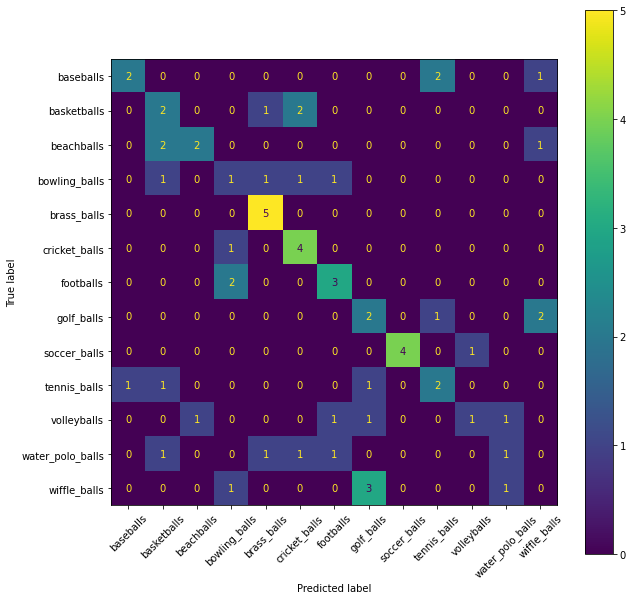

In [31]:
# plotting confusion matrix for the test set

labels = ["baseballs", "basketballs", "beachballs", "bowling_balls", "brass_balls", "cricket_balls", "footballs", "golf_balls", "soccer_balls", "tennis_balls", "volleyballs", "water_polo_balls", "wiffle_balls"]

test_y_pred_w_labels = w_label(test_y_pred)
cm = confusion_matrix(test_y_w_labels, test_y_pred_w_labels, labels=labels)
print("Test set:")
disp, ax = plt.subplots(figsize=(10, 10))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
_ = disp.plot(ax=ax)
_ = plt.xticks(rotation = 45)

### Random Forest III

In [32]:
# hyperparameters

param_grid = {'criterion':['gini', 'entropy'], 
              'n_estimators':np.arange(0,101,10), 
              'max_depth':[None, np.arange(0,101,10)]}

rf_iii_cv = GridSearchCV(rf, param_grid=param_grid, cv=5, n_jobs=-1)

rf_iii_cv.fit(train_X, np.ravel(train_y))

best_combo = rf_iii_cv.best_params_
print('Best combination:', best_combo)

Best combination: {'criterion': 'entropy', 'max_depth': None, 'n_estimators': 80}


In [33]:
# predicting and measuring accuracy

train_y_pred = rf_iii_cv.predict(train_X)
test_y_pred = rf_iii_cv.predict(test_X)

print("Accuracy on training set:", accuracy_score(train_y, train_y_pred))
print("\nAccuracy on testing set:", accuracy_score(test_y, test_y_pred))

Accuracy on training set: 1.0

Accuracy on testing set: 0.4461538461538462


Train set:


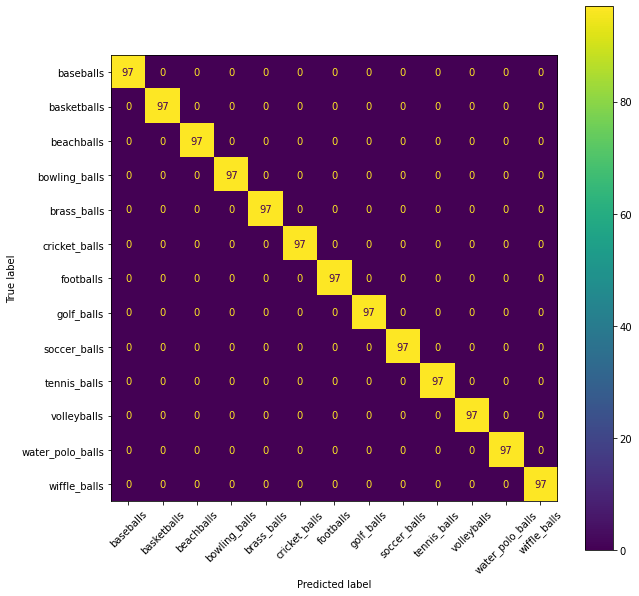

In [34]:
# plotting confusion matrix for the train set

labels = ["baseballs", "basketballs", "beachballs", "bowling_balls", "brass_balls", "cricket_balls", "footballs", "golf_balls", "soccer_balls", "tennis_balls", "volleyballs", "water_polo_balls", "wiffle_balls"]

train_y_pred_w_labels = w_label(train_y_pred)
cm = confusion_matrix(train_y_w_labels, train_y_pred_w_labels, labels=labels)
print("Train set:")
disp, ax = plt.subplots(figsize=(10, 10))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
_ = disp.plot(ax=ax)
_ = plt.xticks(rotation = 45)

Test set:


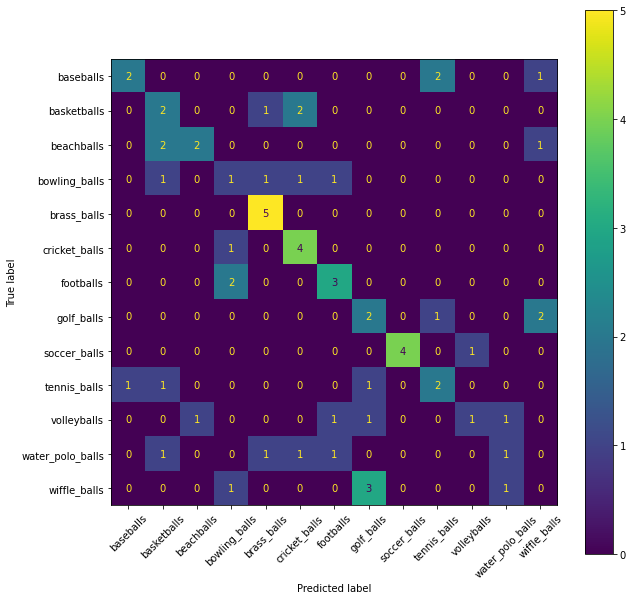

In [35]:
# plotting confusion matrix for the test set

labels = ["baseballs", "basketballs", "beachballs", "bowling_balls", "brass_balls", "cricket_balls", "footballs", "golf_balls", "soccer_balls", "tennis_balls", "volleyballs", "water_polo_balls", "wiffle_balls"]

test_y_pred_w_labels = w_label(test_y_pred)
cm = confusion_matrix(test_y_w_labels, test_y_pred_w_labels, labels=labels)
print("Test set:")
disp, ax = plt.subplots(figsize=(10, 10))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
_ = disp.plot(ax=ax)
_ = plt.xticks(rotation = 45)

### Random Forest IV

In [36]:
# hyperparameters

param_grid = {'criterion':['gini', 'entropy'], 
              'n_estimators':np.arange(0,101,10), 
              'max_depth':[None, np.arange(0,101,10)], 
              'min_samples_leaf':np.arange(0,101,10)}

rf_iv_cv = GridSearchCV(rf, param_grid=param_grid, cv=5, n_jobs=-1)

rf_iv_cv.fit(train_X, np.ravel(train_y))

best_combo = rf_iv_cv.best_params_
print('Best combination:', best_combo)

Best combination: {'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 10, 'n_estimators': 60}


In [37]:
# predicting and measuring accuracy

train_y_pred = rf_iv_cv.predict(train_X)
test_y_pred = rf_iv_cv.predict(test_X)

print("Accuracy on training set:", accuracy_score(train_y, train_y_pred))
print("\nAccuracy on testing set:", accuracy_score(test_y, test_y_pred))

Accuracy on training set: 0.8437747819191118

Accuracy on testing set: 0.4


Train set:


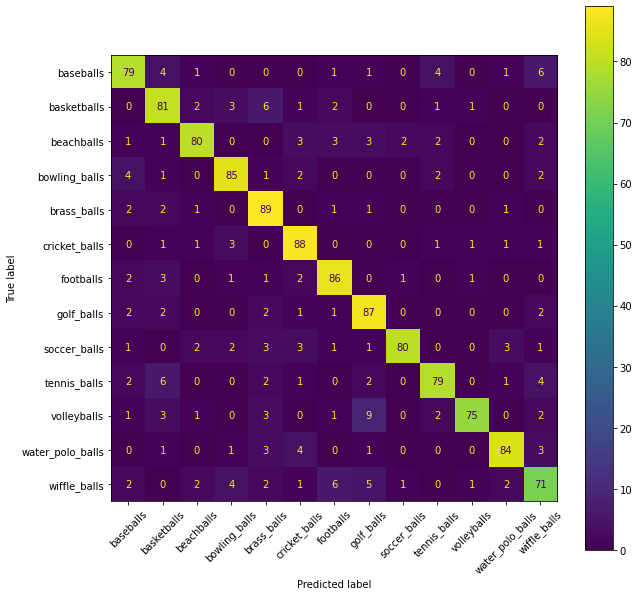

In [38]:
# plotting confusion matrix for the train set

labels = ["baseballs", "basketballs", "beachballs", "bowling_balls", "brass_balls", "cricket_balls", "footballs", "golf_balls", "soccer_balls", "tennis_balls", "volleyballs", "water_polo_balls", "wiffle_balls"]

train_y_pred_w_labels = w_label(train_y_pred)
cm = confusion_matrix(train_y_w_labels, train_y_pred_w_labels, labels=labels)
print("Train set:")
disp, ax = plt.subplots(figsize=(10, 10))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
_ = disp.plot(ax=ax)
_ = plt.xticks(rotation = 45)

Test set:


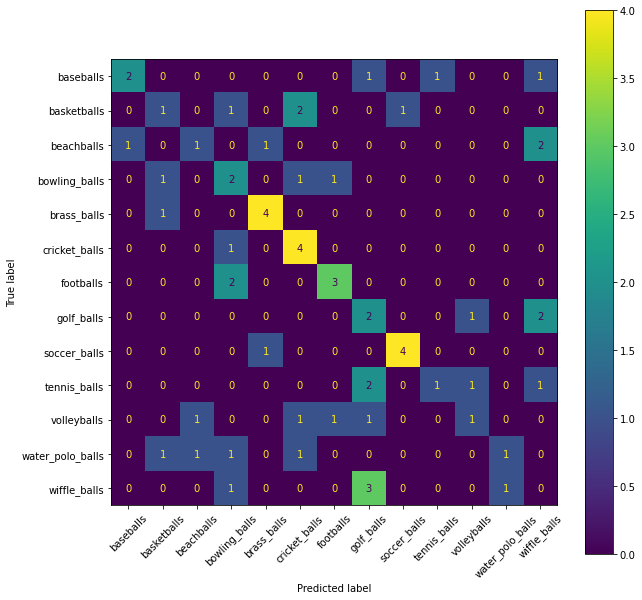

In [39]:
# plotting confusion matrix for the test set

labels = ["baseballs", "basketballs", "beachballs", "bowling_balls", "brass_balls", "cricket_balls", "footballs", "golf_balls", "soccer_balls", "tennis_balls", "volleyballs", "water_polo_balls", "wiffle_balls"]

test_y_pred_w_labels = w_label(test_y_pred)
cm = confusion_matrix(test_y_w_labels, test_y_pred_w_labels, labels=labels)
print("Test set:")
disp, ax = plt.subplots(figsize=(10, 10))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
_ = disp.plot(ax=ax)
_ = plt.xticks(rotation = 45)

### PyTorch CNN

In [40]:
import matplotlib.pyplot as plt

import os
import torch
import glob
import torch.nn as nn
from torchvision.transforms import transforms
from torch.utils.data import DataLoader
from torch.optim import Adam
from torch.autograd import Variable
import torchvision
import pathlib

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

import warnings
warnings.filterwarnings("ignore")

In [41]:
device = torch.device("cpu")

In [42]:
# Transforms

transformer=transforms.Compose([transforms.ToTensor()])

In [43]:
# Path for training and testing directory

train_path = 'resized_images/train'
test_path = 'resized_images/test'

In [44]:
def accuracy_test(model, dataloader):
    truth_labels = np.asarray([]).astype(int)
    predictions = np.asarray([]).astype(int)
    model.eval()
    
    for i, (images, label) in enumerate(dataloader): 
        label = label.numpy()
        truth_labels = np.concatenate((truth_labels, label))
        
        outputs = model(images)
        _, prediction = torch.max(outputs.data, 1)
        prediction = prediction.numpy()
        predictions = np.concatenate((predictions, prediction))
        
    return truth_labels, predictions

In [45]:
# CNN network

class ConvNet(nn.Module):
    def __init__(self,num_classes=13):
        super(ConvNet,self).__init__()
        self.relu = nn.ReLU()
        self.fc1 = nn.Linear(in_features=56*56*3, out_features=4500)
        self.fc2 = nn.Linear(in_features=4500, out_features=num_classes)
        
    def forward(self, input):
        output = input.view(-1,3*56*56)
        output = self.fc1(output)
        output = self.relu(output)
        output = self.fc2(output)
        output = self.relu(output)
        return output

In [46]:
torch.manual_seed(77)

# DataLoader

train_loader = DataLoader(torchvision.datasets.ImageFolder(train_path, transform=transformer), batch_size=64, shuffle=True)
test_loader = DataLoader(torchvision.datasets.ImageFolder(test_path, transform=transformer), batch_size=32, shuffle=True)

cnn = ConvNet(num_classes=13).to(device)
optimizer = Adam(cnn.parameters(), lr=0.001, weight_decay=0.0001)
loss_function = nn.CrossEntropyLoss()
num_epochs = 10

for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        optimizer.zero_grad()
        outputs = cnn(images)
        loss = loss_function(outputs, labels)
        loss.backward()
        optimizer.step()

train_y_true, train_y_pred = accuracy_test(cnn, train_loader)
test_y_true, test_y_pred = accuracy_test(cnn, test_loader)

print("Accuracy on training set:", accuracy_score(train_y_true, train_y_pred))
print("\nAccuracy on testing set:", accuracy_score(test_y_true, test_y_pred))

Accuracy on training set: 0.07692307692307693

Accuracy on testing set: 0.07692307692307693


Train set:


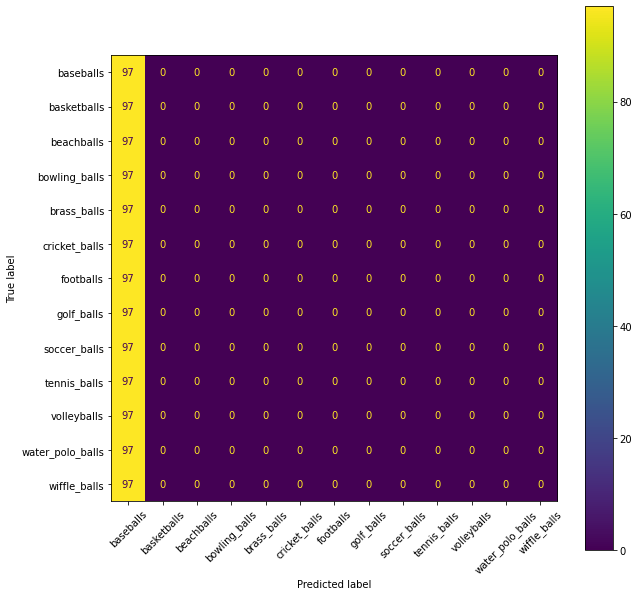

In [47]:
# plotting confusion matrix for the train set

labels = ["baseballs", "basketballs", "beachballs", "bowling_balls", "brass_balls", "cricket_balls", "footballs", "golf_balls", "soccer_balls", "tennis_balls", "volleyballs", "water_polo_balls", "wiffle_balls"]

train_y_true_w_labels = w_label(train_y_true)
train_y_pred_w_labels = w_label(train_y_pred)
cm = confusion_matrix(train_y_true_w_labels, train_y_pred_w_labels, labels=labels)
print("Train set:")
disp, ax = plt.subplots(figsize=(10, 10))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
_ = disp.plot(ax=ax)
_ = plt.xticks(rotation = 45)

Test set:


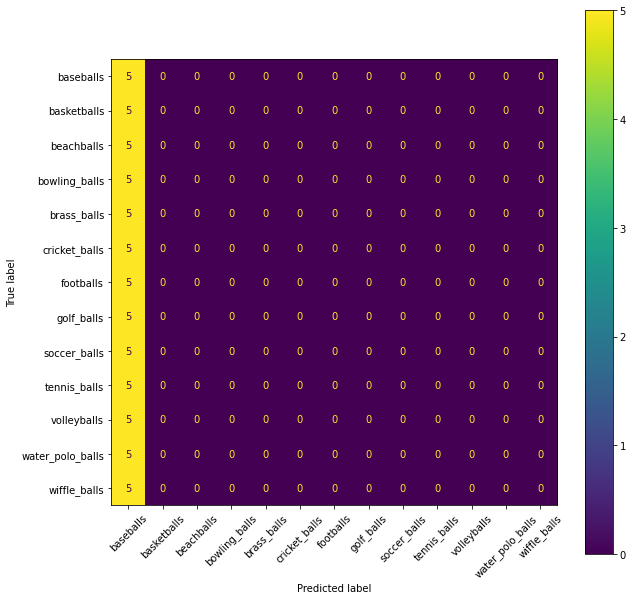

In [48]:
# plotting confusion matrix for the test set

labels = ["baseballs", "basketballs", "beachballs", "bowling_balls", "brass_balls", "cricket_balls", "footballs", "golf_balls", "soccer_balls", "tennis_balls", "volleyballs", "water_polo_balls", "wiffle_balls"]

test_y_true_w_labels = w_label(test_y_true)
test_y_pred_w_labels = w_label(test_y_pred)
cm = confusion_matrix(test_y_true_w_labels, test_y_pred_w_labels, labels=labels)
print("Test set:")
disp, ax = plt.subplots(figsize=(10, 10))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
_ = disp.plot(ax=ax)
_ = plt.xticks(rotation = 45)

### PyTorch CNN II

In [49]:
class ConvNet_ii(nn.Module):
    def __init__(self,num_classes=13):
        super(ConvNet_ii,self).__init__()
        self.relu = nn.ReLU()
        self.conv1 = nn.Conv2d(in_channels=3, out_channels=12, kernel_size=3, stride=1, padding=1)
        self.conv2 = nn.Conv2d(in_channels=12, out_channels=20, kernel_size=3, stride=1, padding=1)
        self.conv3 = nn.Conv2d(in_channels=20, out_channels=32, kernel_size=3, stride=1, padding=1)
        self.fc = nn.Linear(in_features=56*56*32, out_features=num_classes)
        
    def forward(self, input):
        output = self.conv1(input)
        output = self.relu(output)
        output = self.conv2(output)
        output = self.relu(output)
        output = self.conv3(output)
        output = self.relu(output)
        output = output.view(-1,32*56*56)
        output = self.fc(output)
        return output

In [50]:
torch.manual_seed(77)

# DataLoader

train_loader = DataLoader(torchvision.datasets.ImageFolder(train_path, transform=transformer), batch_size=64, shuffle=True)
test_loader = DataLoader(torchvision.datasets.ImageFolder(test_path, transform=transformer), batch_size=32, shuffle=True)

cnn = ConvNet_ii(num_classes=13).to(device)
optimizer = Adam(cnn.parameters(), lr=0.001, weight_decay=0.0001)
loss_function = nn.CrossEntropyLoss()
num_epochs = 10

for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        optimizer.zero_grad()
        outputs = cnn(images)
        loss = loss_function(outputs, labels)
        loss.backward()
        optimizer.step()

train_y_true, train_y_pred = accuracy_test(cnn, train_loader)
test_y_true, test_y_pred = accuracy_test(cnn, test_loader)

print("Accuracy on training set:", accuracy_score(train_y_true, train_y_pred))
print("\nAccuracy on testing set:", accuracy_score(test_y_true, test_y_pred))

Accuracy on training set: 0.9095955590800952

Accuracy on testing set: 0.4307692307692308


Train set:


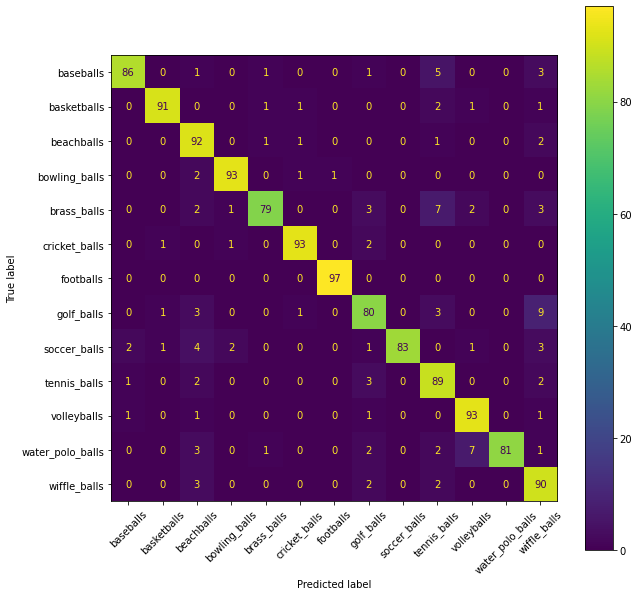

In [51]:
# plotting confusion matrix for the train set

labels = ["baseballs", "basketballs", "beachballs", "bowling_balls", "brass_balls", "cricket_balls", "footballs", "golf_balls", "soccer_balls", "tennis_balls", "volleyballs", "water_polo_balls", "wiffle_balls"]

train_y_true_w_labels = w_label(train_y_true)
train_y_pred_w_labels = w_label(train_y_pred)
cm = confusion_matrix(train_y_true_w_labels, train_y_pred_w_labels, labels=labels)
print("Train set:")
disp, ax = plt.subplots(figsize=(10, 10))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
_ = disp.plot(ax=ax)
_ = plt.xticks(rotation = 45)

Test set:


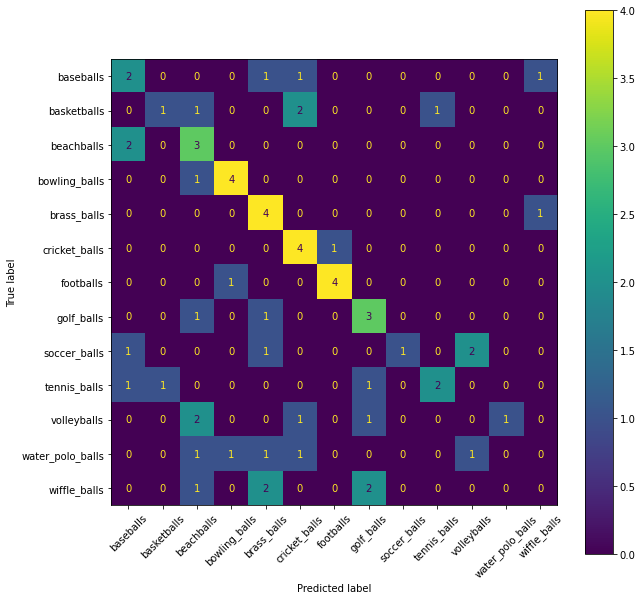

In [52]:
# plotting confusion matrix for the test set

labels = ["baseballs", "basketballs", "beachballs", "bowling_balls", "brass_balls", "cricket_balls", "footballs", "golf_balls", "soccer_balls", "tennis_balls", "volleyballs", "water_polo_balls", "wiffle_balls"]

test_y_true_w_labels = w_label(test_y_true)
test_y_pred_w_labels = w_label(test_y_pred)
cm = confusion_matrix(test_y_true_w_labels, test_y_pred_w_labels, labels=labels)
print("Test set:")
disp, ax = plt.subplots(figsize=(10, 10))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
_ = disp.plot(ax=ax)
_ = plt.xticks(rotation = 45)

### PyTorch CNN III

In [53]:
class ConvNet_iii(nn.Module):
    def __init__(self,num_classes=13):
        super(ConvNet_iii,self).__init__()
        self.relu = nn.ReLU()
        self.conv1 = nn.Conv2d(in_channels=3, out_channels=12, kernel_size=3, stride=1, padding=1)
        self.pool = nn.MaxPool2d(kernel_size=2) # Reduce the image size by factor of 2
        self.conv2 = nn.Conv2d(in_channels=12, out_channels=20, kernel_size=3, stride=1, padding=1)
        self.conv3 = nn.Conv2d(in_channels=20, out_channels=32, kernel_size=3, stride=1, padding=1)
        self.fc = nn.Linear(in_features=28*28*32, out_features=num_classes)
        
    def forward(self, input):
        output = self.conv1(input)
        output = self.relu(output)
        output = self.pool(output)
        output = self.conv2(output)
        output = self.relu(output)
        output = self.conv3(output)
        output = self.relu(output)
        output = output.view(-1,32*28*28)
        output = self.fc(output)
        return output

In [54]:
torch.manual_seed(77)

# DataLoader

train_loader = DataLoader(torchvision.datasets.ImageFolder(train_path, transform=transformer), batch_size=64, shuffle=True)
test_loader = DataLoader(torchvision.datasets.ImageFolder(test_path, transform=transformer), batch_size=32, shuffle=True)

cnn = ConvNet_iii(num_classes=13).to(device)
optimizer = Adam(cnn.parameters(), lr=0.001, weight_decay=0.0001)
loss_function = nn.CrossEntropyLoss()
num_epochs = 10

for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        optimizer.zero_grad()
        outputs = cnn(images)
        loss = loss_function(outputs, labels)
        loss.backward()
        optimizer.step()

train_y_true, train_y_pred = accuracy_test(cnn, train_loader)
test_y_true, test_y_pred = accuracy_test(cnn, test_loader)

print("Accuracy on training set:", accuracy_score(train_y_true, train_y_pred))
print("\nAccuracy on testing set:", accuracy_score(test_y_true, test_y_pred))

Accuracy on training set: 0.7795400475812847

Accuracy on testing set: 0.46153846153846156


Train set:


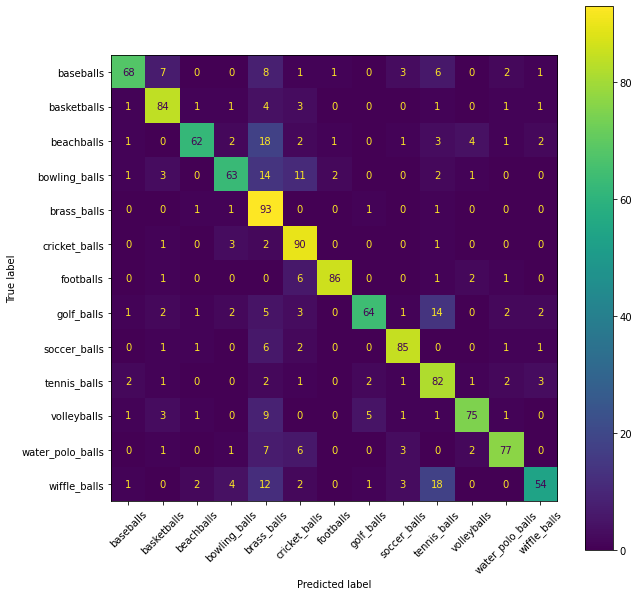

In [55]:
# plotting confusion matrix for the train set

labels = ["baseballs", "basketballs", "beachballs", "bowling_balls", "brass_balls", "cricket_balls", "footballs", "golf_balls", "soccer_balls", "tennis_balls", "volleyballs", "water_polo_balls", "wiffle_balls"]

train_y_true_w_labels = w_label(train_y_true)
train_y_pred_w_labels = w_label(train_y_pred)
cm = confusion_matrix(train_y_true_w_labels, train_y_pred_w_labels, labels=labels)
print("Train set:")
disp, ax = plt.subplots(figsize=(10, 10))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
_ = disp.plot(ax=ax)
_ = plt.xticks(rotation = 45)

Test set:


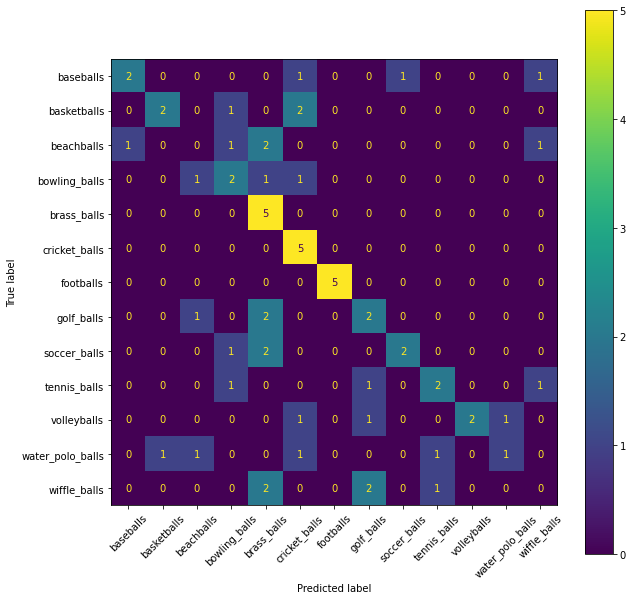

In [56]:
# plotting confusion matrix for the test set

labels = ["baseballs", "basketballs", "beachballs", "bowling_balls", "brass_balls", "cricket_balls", "footballs", "golf_balls", "soccer_balls", "tennis_balls", "volleyballs", "water_polo_balls", "wiffle_balls"]

test_y_true_w_labels = w_label(test_y_true)
test_y_pred_w_labels = w_label(test_y_pred)
cm = confusion_matrix(test_y_true_w_labels, test_y_pred_w_labels, labels=labels)
print("Test set:")
disp, ax = plt.subplots(figsize=(10, 10))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
_ = disp.plot(ax=ax)
_ = plt.xticks(rotation = 45)

### PyTorch CNN IV

In [57]:
class ConvNet_iv(nn.Module):
    def __init__(self,num_classes=13):
        super(ConvNet_iv,self).__init__()
        self.relu = nn.ReLU()
        self.conv1 = nn.Conv2d(in_channels=3, out_channels=12, kernel_size=3, stride=1, padding=1)
        self.pool = nn.MaxPool2d(kernel_size=2)
        self.bn1 = nn.BatchNorm2d(num_features=12)
        self.conv2 = nn.Conv2d(in_channels=12, out_channels=20, kernel_size=3, stride=1, padding=1)
        self.conv3 = nn.Conv2d(in_channels=20, out_channels=32, kernel_size=3, stride=1, padding=1)
        self.bn3 = nn.BatchNorm2d(num_features=32)
        self.fc = nn.Linear(in_features=28*28*32, out_features=num_classes)
        
    def forward(self, input):
        output = self.conv1(input)
        output = self.bn1(output)
        output = self.relu(output)
        output = self.pool(output)
        output = self.conv2(output)
        output = self.relu(output)
        output = self.conv3(output)
        output = self.bn3(output)
        output = self.relu(output)
        output = output.view(-1,32*28*28)
        output = self.fc(output)
        return output

In [58]:
torch.manual_seed(77)

# DataLoader

train_loader = DataLoader(torchvision.datasets.ImageFolder(train_path, transform=transformer), batch_size=64, shuffle=True)
test_loader = DataLoader(torchvision.datasets.ImageFolder(test_path, transform=transformer), batch_size=32, shuffle=True)

cnn = ConvNet_iv(num_classes=13).to(device)
optimizer = Adam(cnn.parameters(), lr=0.001, weight_decay=0.0001)
loss_function = nn.CrossEntropyLoss()
num_epochs = 10

for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        optimizer.zero_grad()
        outputs = cnn(images)
        loss = loss_function(outputs, labels)
        loss.backward()
        optimizer.step()

train_y_true, train_y_pred = accuracy_test(cnn, train_loader)
test_y_true, test_y_pred = accuracy_test(cnn, test_loader)

print("Accuracy on training set:", accuracy_score(train_y_true, train_y_pred))
print("\nAccuracy on testing set:", accuracy_score(test_y_true, test_y_pred))

Accuracy on training set: 1.0

Accuracy on testing set: 0.5076923076923077


Train set:


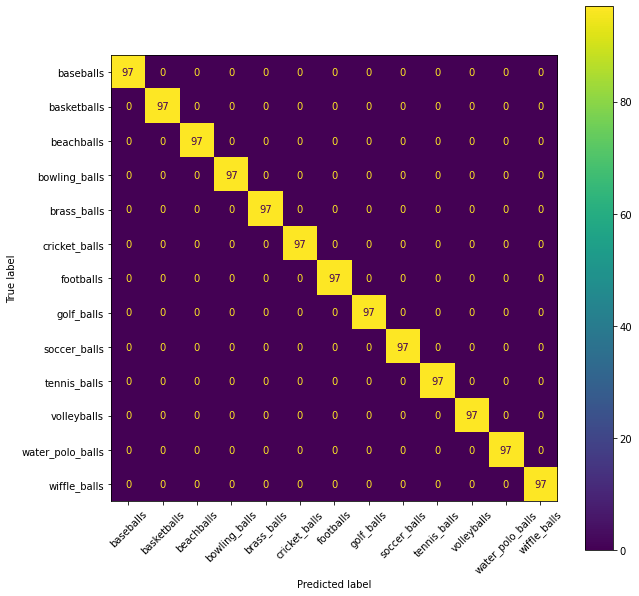

In [59]:
# plotting confusion matrix for the train set

labels = ["baseballs", "basketballs", "beachballs", "bowling_balls", "brass_balls", "cricket_balls", "footballs", "golf_balls", "soccer_balls", "tennis_balls", "volleyballs", "water_polo_balls", "wiffle_balls"]

train_y_true_w_labels = w_label(train_y_true)
train_y_pred_w_labels = w_label(train_y_pred)
cm = confusion_matrix(train_y_true_w_labels, train_y_pred_w_labels, labels=labels)
print("Train set:")
disp, ax = plt.subplots(figsize=(10, 10))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
_ = disp.plot(ax=ax)
_ = plt.xticks(rotation = 45)

Test set:


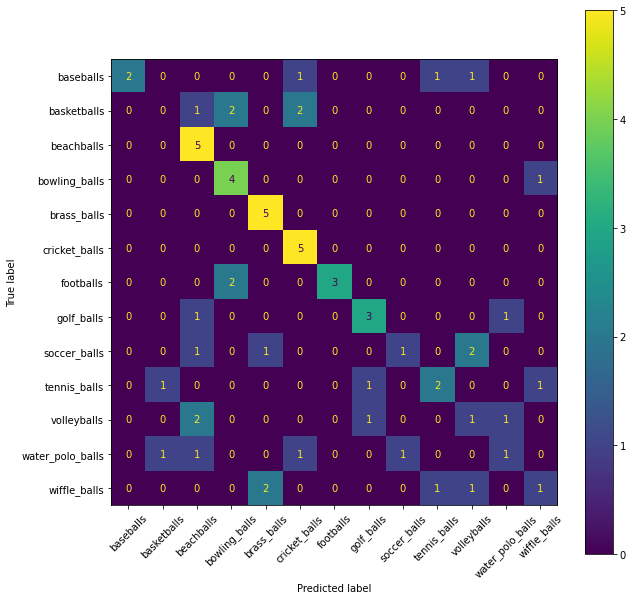

In [60]:
# plotting confusion matrix for the test set

labels = ["baseballs", "basketballs", "beachballs", "bowling_balls", "brass_balls", "cricket_balls", "footballs", "golf_balls", "soccer_balls", "tennis_balls", "volleyballs", "water_polo_balls", "wiffle_balls"]

test_y_true_w_labels = w_label(test_y_true)
test_y_pred_w_labels = w_label(test_y_pred)
cm = confusion_matrix(test_y_true_w_labels, test_y_pred_w_labels, labels=labels)
print("Test set:")
disp, ax = plt.subplots(figsize=(10, 10))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
_ = disp.plot(ax=ax)
_ = plt.xticks(rotation = 45)

### PyTorch CNN V

In [61]:
class ConvNet_v(nn.Module):
    def __init__(self,num_classes=13):
        super(ConvNet_v,self).__init__()
        self.relu = nn.ReLU()
        self.conv1 = nn.Conv2d(in_channels=3, out_channels=9, kernel_size=3, stride=1, padding=1)
        self.pool1 = nn.MaxPool2d(kernel_size=2)
        self.bn1 = nn.BatchNorm2d(num_features=9)
        self.conv2 = nn.Conv2d(in_channels=9, out_channels=27, kernel_size=3, stride=1, padding=1)
        self.conv3 = nn.Conv2d(in_channels=27, out_channels=81, kernel_size=3, stride=1, padding=1)
        self.bn3 = nn.BatchNorm2d(num_features=81)
        self.conv4 = nn.Conv2d(in_channels=81, out_channels=124, kernel_size=3, stride=1, padding=1)
        self.fc1 = nn.Linear(in_features=7*7*124, out_features=num_classes)
        
    def forward(self, input):
        output = self.conv1(input)
        output = self.bn1(output)
        output = self.relu(output)
        output = self.pool1(output)
        output = self.conv2(output)
        output = self.relu(output)
        output = self.pool1(output)
        output = self.conv3(output)
        output = self.bn3(output)
        output = self.relu(output)
        output = self.pool1(output)
        output = self.conv4(output)
        output = self.relu(output)
        output = output.view(-1,124*7*7)
        output = self.fc1(output)
        return output

In [62]:
torch.manual_seed(77)

# DataLoader

train_loader = DataLoader(torchvision.datasets.ImageFolder(train_path, transform=transformer), batch_size=64, shuffle=True)
test_loader = DataLoader(torchvision.datasets.ImageFolder(test_path, transform=transformer), batch_size=32, shuffle=True)

cnn = ConvNet_v(num_classes=13).to(device)
optimizer = Adam(cnn.parameters(), lr=0.001, weight_decay=0.0001)
loss_function = nn.CrossEntropyLoss()
num_epochs = 10

for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        optimizer.zero_grad()
        outputs = cnn(images)
        loss = loss_function(outputs, labels)
        loss.backward()
        optimizer.step()

train_y_true, train_y_pred = accuracy_test(cnn, train_loader)
test_y_true, test_y_pred = accuracy_test(cnn, test_loader)

print("Accuracy on training set:", accuracy_score(train_y_true, train_y_pred))
print("\nAccuracy on testing set:", accuracy_score(test_y_true, test_y_pred))

Accuracy on training set: 0.8865979381443299

Accuracy on testing set: 0.6153846153846154


Train set:


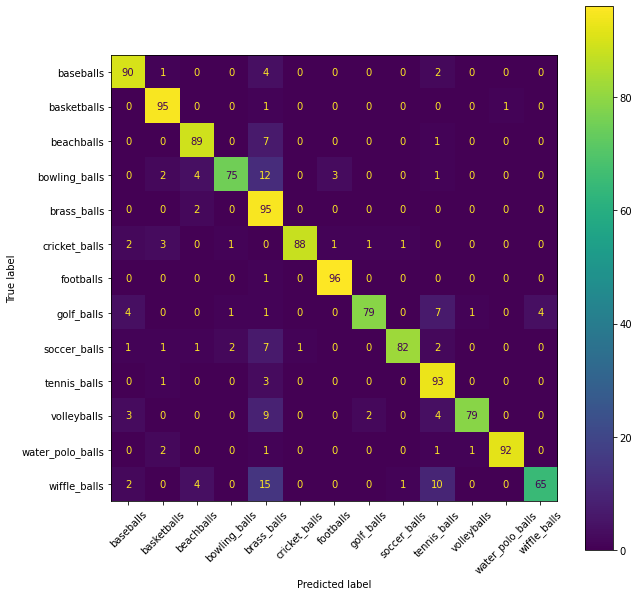

In [63]:
# plotting confusion matrix for the train set

labels = ["baseballs", "basketballs", "beachballs", "bowling_balls", "brass_balls", "cricket_balls", "footballs", "golf_balls", "soccer_balls", "tennis_balls", "volleyballs", "water_polo_balls", "wiffle_balls"]

train_y_true_w_labels = w_label(train_y_true)
train_y_pred_w_labels = w_label(train_y_pred)
cm = confusion_matrix(train_y_true_w_labels, train_y_pred_w_labels, labels=labels)
print("Train set:")
disp, ax = plt.subplots(figsize=(10, 10))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
_ = disp.plot(ax=ax)
_ = plt.xticks(rotation = 45)

Test set:


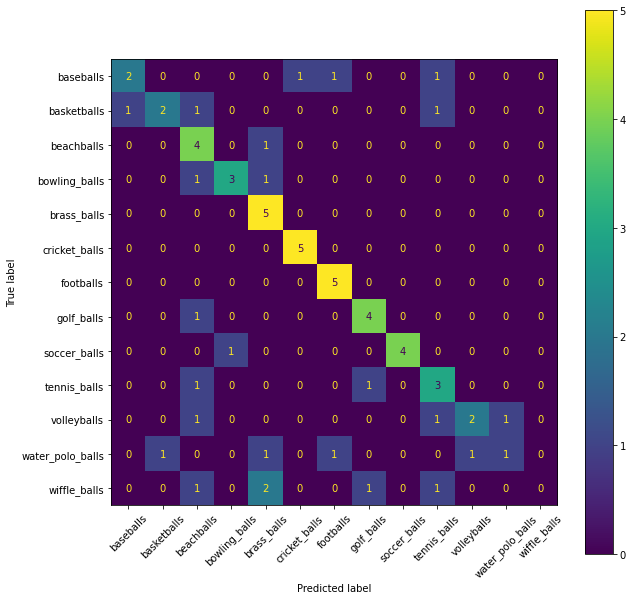

In [64]:
# plotting confusion matrix for the test set

labels = ["baseballs", "basketballs", "beachballs", "bowling_balls", "brass_balls", "cricket_balls", "footballs", "golf_balls", "soccer_balls", "tennis_balls", "volleyballs", "water_polo_balls", "wiffle_balls"]

test_y_true_w_labels = w_label(test_y_true)
test_y_pred_w_labels = w_label(test_y_pred)
cm = confusion_matrix(test_y_true_w_labels, test_y_pred_w_labels, labels=labels)
print("Test set:")
disp, ax = plt.subplots(figsize=(10, 10))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
_ = disp.plot(ax=ax)
_ = plt.xticks(rotation = 45)